In [10]:
import numpy as np
import cv2
import matplotlib
from matplotlib import pyplot as plt
%matplotlib inline

In [11]:
img =cv2.imread('./test_image/Anne-Marie Songs Download _ Anne-Marie....jpg')

In [12]:
img.shape

(200, 200, 3)

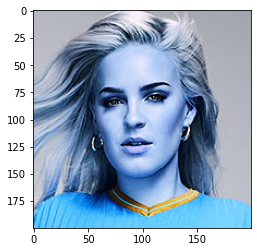

In [13]:
plt.imshow(img)

In [14]:
gray=cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
gray.shape

(200, 200)

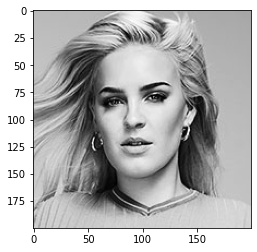

In [15]:
plt.imshow(gray,cmap='gray')

In [16]:
face_cascade=cv2.CascadeClassifier('./haarcascades/haarcascade_frontalface_default.xml')
eye_cascade=cv2.CascadeClassifier('./haarcascades/haarcascade_eye.xml')
faces=face_cascade.detectMultiScale(gray,1.2,5)
faces

array([[ 41,  40, 107, 107]], dtype=int32)

In [17]:
(x,y,w,h)=faces[0]
x,y,w,h

(41, 40, 107, 107)

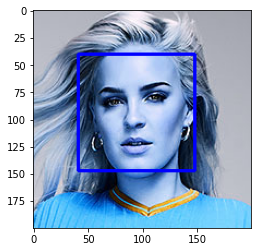

In [18]:
face_img =cv2.rectangle(img,(x,y),(x+w,y+h),(0,0,255),2)
plt.imshow(face_img)

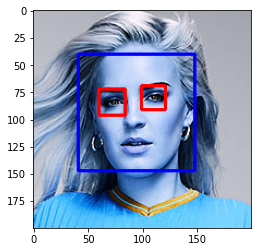

In [19]:
cv2.destroyAllWindows()
for (x,y,w,h) in faces:
    face_img = cv2.rectangle(img,(x,y),(x+w,y+h),(0,0,255),2)
    roi_gray = gray[y:y+h, x:x+w]
    roi_color = face_img[y:y+h, x:x+w]
    eyes = eye_cascade.detectMultiScale(roi_gray)
    for (ex,ey,ew,eh) in eyes:
        cv2.rectangle(roi_color,(ex,ey),(ex+ew,ey+eh),(255,0,0),2)
        

plt.figure()
plt.imshow(face_img, cmap='gray')
plt.show()

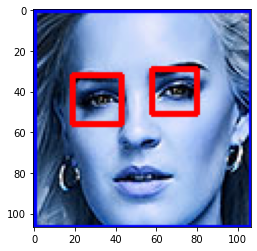

In [20]:
%matplotlib inline
plt.imshow(roi_color,cmap='gray')

In [21]:
def get_cropped_image_if_2_eyes(image_path):
    img = cv2.imread(image_path)
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    faces = face_cascade.detectMultiScale(gray, 1.2, 5)
    for (x,y,w,h) in faces:
        roi_gray = gray[y:y+h, x:x+w]
        roi_color = img[y:y+h, x:x+w]
        eyes = eye_cascade.detectMultiScale(roi_gray)
        if len(eyes) >= 2:
            return roi_color
        else:
            return None

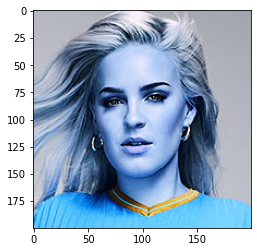

In [22]:
original_image = cv2.imread('./test_image/Anne-Marie Songs Download _ Anne-Marie....jpg')
plt.imshow(original_image)

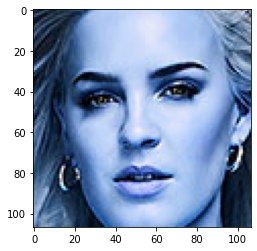

In [23]:
cropped_image=get_cropped_image_if_2_eyes('./test_image/Anne-Marie Songs Download _ Anne-Marie....jpg')
plt.imshow(cropped_image)

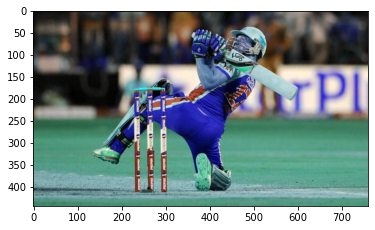

In [24]:
original_not_visible = cv2.imread('./test_image/AB de Villiers_ The all-round batter-er....jpg')
plt.imshow(original_not_visible)

In [ ]:
cropped_image2=get_cropped_image_if_2_eyes('./test_image/AB de Villiers_ The all-round batter-er....jpg')
plt.imshow(cropped_image2)

In [43]:
path_to_data="./datasets/"
path_to_cr_data="./datasets/cropped/"

In [52]:
import os
img_dirs=[]
for entry in os.scandir(path_to_data):
    if entry.is_dir():
        img_dirs.append(entry.path)

In [53]:
img_dirs

['./datasets/kyle_jenner',
 './datasets/virat_kohli',
 './datasets/abd',
 './datasets/.ipynb_checkpoints',
 './datasets/anne_marie',
 './datasets/cristiano_ronaldo',
 './datasets/taylor_swift',
 './datasets/zlatan',
 './datasets/messi',
 './datasets/kendall_jenner',
 './datasets/selena_gomez']

In [54]:
import shutil
if os.path.exists(path_to_cr_data):
     shutil.rmtree(path_to_cr_data)
os.mkdir(path_to_cr_data)    

In [55]:
cropped_image_dirs = []
celebrity_file_names_dict = {}

for img_dir in img_dirs:
    count = 1
    celebrity_name = img_dir.split('/')[-1]
    print(celebrity_name)
    
    celebrity_file_names_dict[celebrity_name] = []
    
    for entry in os.scandir(img_dir):
        roi_color = get_cropped_image_if_2_eyes(entry.path)
        if roi_color is not None:
            cropped_folder = path_to_cr_data + celebrity_name
            if not os.path.exists(cropped_folder):
                os.makedirs(cropped_folder)
                cropped_image_dirs.append(cropped_folder)
                print("Generating cropped images in folder: ",cropped_folder)
                
            cropped_file_name = celebrity_name + str(count) + ".png"
            cropped_file_path = cropped_folder + "/" + cropped_file_name 
            
            cv2.imwrite(cropped_file_path, roi_color)
            celebrity_file_names_dict[celebrity_name].append(cropped_file_path)
            count += 1

kyle_jenner
Generating cropped images in folder:  ./datasets/cropped/kyle_jenner
virat_kohli
Generating cropped images in folder:  ./datasets/cropped/virat_kohli
abd
Generating cropped images in folder:  ./datasets/cropped/abd
.ipynb_checkpoints
anne_marie
Generating cropped images in folder:  ./datasets/cropped/anne_marie
cristiano_ronaldo
Generating cropped images in folder:  ./datasets/cropped/cristiano_ronaldo
taylor_swift
Generating cropped images in folder:  ./datasets/cropped/taylor_swift
zlatan
Generating cropped images in folder:  ./datasets/cropped/zlatan
messi
Generating cropped images in folder:  ./datasets/cropped/messi
kendall_jenner
Generating cropped images in folder:  ./datasets/cropped/kendall_jenner
selena_gomez
Generating cropped images in folder:  ./datasets/cropped/selena_gomez


# Wavelet Transform

In [56]:
import numpy as np
import pywt
import cv2

def w2d(img,mode='haar',level=1):
    imArray=img
    
    imArray=cv2.cvtColor(imArray,cv2.COLOR_RGB2GRAY)
    imArray=np.float32(imArray)
    imArray/=255
    
    coeffs=pywt.wavedec2(imArray,mode,level=level)
    coeffs_H=list(coeffs)
    coeffs_H[0] *=0
    imArray_H=pywt.waverec2(coeffs_H,mode);
    imArray_H *= 255;
    imArray_H=np.uint8(imArray_H)
    
    return imArray_H

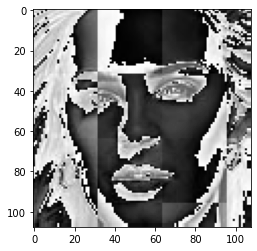

In [57]:
im_hr=w2d(cropped_image,'db1',5)
plt.imshow(im_hr,cmap='gray')

In [58]:
celebrity_file_names_dict

{'kyle_jenner': ['./datasets/cropped/kyle_jenner/kyle_jenner1.png',
  './datasets/cropped/kyle_jenner/kyle_jenner2.png',
  './datasets/cropped/kyle_jenner/kyle_jenner3.png',
  './datasets/cropped/kyle_jenner/kyle_jenner4.png',
  './datasets/cropped/kyle_jenner/kyle_jenner5.png',
  './datasets/cropped/kyle_jenner/kyle_jenner6.png',
  './datasets/cropped/kyle_jenner/kyle_jenner7.png',
  './datasets/cropped/kyle_jenner/kyle_jenner8.png',
  './datasets/cropped/kyle_jenner/kyle_jenner9.png',
  './datasets/cropped/kyle_jenner/kyle_jenner10.png',
  './datasets/cropped/kyle_jenner/kyle_jenner11.png',
  './datasets/cropped/kyle_jenner/kyle_jenner12.png',
  './datasets/cropped/kyle_jenner/kyle_jenner13.png',
  './datasets/cropped/kyle_jenner/kyle_jenner14.png',
  './datasets/cropped/kyle_jenner/kyle_jenner15.png',
  './datasets/cropped/kyle_jenner/kyle_jenner16.png',
  './datasets/cropped/kyle_jenner/kyle_jenner17.png',
  './datasets/cropped/kyle_jenner/kyle_jenner18.png',
  './datasets/cropped/

In [60]:
class_dict={}
count=0
for celebrity_name in celebrity_file_names_dict.keys():
    class_dict[celebrity_name]=count
    count+=1
class_dict    

{'kyle_jenner': 0,
 'virat_kohli': 1,
 'abd': 2,
 '.ipynb_checkpoints': 3,
 'anne_marie': 4,
 'cristiano_ronaldo': 5,
 'taylor_swift': 6,
 'zlatan': 7,
 'messi': 8,
 'kendall_jenner': 9,
 'selena_gomez': 10}

In [61]:
X, y = [], []
for celebrity_name, training_files in celebrity_file_names_dict.items():
    for training_image in training_files:
        img = cv2.imread(training_image)
        scalled_raw_img = cv2.resize(img, (32, 32))
        img_har = w2d(img,'db1',5)
        scalled_img_har = cv2.resize(img_har, (32, 32))
        combined_img = np.vstack((scalled_raw_img.reshape(32*32*3,1),scalled_img_har.reshape(32*32,1)))
        X.append(combined_img)
        y.append(class_dict[celebrity_name])

In [63]:
len(X[0])

4096

In [64]:
X=np.array(X).reshape(len(X),4096).astype(float)
X.shape

(722, 4096)

In [65]:
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.metrics import classification_report



In [77]:
X_train,X_test,y_train,y_test = train_test_split(X,y,random_state=0)
pipe=Pipeline([('scaler',StandardScaler()),('svc',SVC(kernel='rbf',C=40))])
pipe.fit(X_train,y_train)
pipe.score(X_test,y_test)


0.6906077348066298

In [78]:
len(X_test)

181

In [79]:
print(classification_report(y_test,pipe.predict(X_test)))

              precision    recall  f1-score   support

           0       0.71      0.67      0.69        30
           1       0.73      1.00      0.84         8
           2       0.00      0.00      0.00         4
           4       0.59      0.73      0.65        22
           5       0.58      0.69      0.63        16
           6       0.94      0.94      0.94        17
           7       1.00      1.00      1.00         5
           8       1.00      0.47      0.64        17
           9       0.62      0.69      0.65        35
          10       0.63      0.63      0.63        27

    accuracy                           0.69       181
   macro avg       0.68      0.68      0.67       181
weighted avg       0.70      0.69      0.68       181



/home/srinjay/anaconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/srinjay/anaconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/srinjay/anaconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


# GridSearch


In [86]:
from sklearn import svm
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import make_pipeline
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import GridSearchCV
import pandas as pd

In [95]:
model_params={
    'svm':{
        'model':svm.SVC(gamma='auto',probability=True),
        'params':{
            'svc__C':[1,10,100,1000],
            'svc__kernel':['rbf','linear']
        }
        
    },
    'random_forest':{
        'model':RandomForestClassifier(),
        'params':{
            'randomforestclassifier__n_estimators':[1,5,10]
        }
        
    },
    'logistic_regression':{
        'model':LogisticRegression(solver='liblinear',multi_class='auto'),
        'params':{
            'logisticregression__C':[1,5,10]
        }
        
    }
    
}

In [96]:
scores=[]
best_estimators={}
for algo,mp in model_params.items():
    pipe=make_pipeline(StandardScaler(),mp['model'])
    clf=GridSearchCV(pipe,mp['params'],cv=5,return_train_score=False)
    clf.fit(X_train,y_train)
    scores.append({
        'model':algo,
        'best_score':clf.best_score_,
        'best_params':clf.best_params_
        
    })
    best_estimators[algo]=clf.best_estimator_
df=pd.DataFrame(scores,columns=['model','best_score','best_params'])
df


,model,best_score,best_params
0,svm,0.678372,"{'svc__C': 1, 'svc__kernel': 'linear'}"
1,random_forest,0.430564,{'randomforestclassifier__n_estimators': 10}
2,logistic_regression,0.656235,{'logisticregression__C': 1}


In [97]:
best_estimators

{'svm': Pipeline(steps=[('standardscaler', StandardScaler()),
                 ('svc',
                  SVC(C=1, gamma='auto', kernel='linear', probability=True))]),
 'random_forest': Pipeline(steps=[('standardscaler', StandardScaler()),
                 ('randomforestclassifier',
                  RandomForestClassifier(n_estimators=10))]),
 'logistic_regression': Pipeline(steps=[('standardscaler', StandardScaler()),
                 ('logisticregression',
                  LogisticRegression(C=1, solver='liblinear'))])}

In [99]:
best_estimators['svm'].score(X_test,y_test)

0.7071823204419889

In [100]:
best_estimators['random_forest'].score(X_test,y_test)

0.4972375690607735

In [101]:
best_estimators['logistic_regression'].score(X_test,y_test)

0.6519337016574586

In [107]:
best_clf=best_estimators['svm']

In [108]:
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(y_test,best_clf.predict(X_test))
cm

array([[17,  0,  0,  7,  0,  0,  0,  0,  5,  1],
       [ 0,  8,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  1,  0,  0,  1,  0,  1,  0,  1],
       [ 0,  0,  1, 17,  0,  0,  1,  0,  2,  1],
       [ 1,  0,  0,  0, 12,  0,  1,  0,  1,  1],
       [ 0,  0,  0,  0,  0, 16,  0,  0,  1,  0],
       [ 0,  0,  0,  0,  0,  0,  5,  0,  0,  0],
       [ 1,  0,  0,  1,  3,  0,  1, 11,  0,  0],
       [ 4,  0,  0,  1,  0,  0,  0,  0, 24,  6],
       [ 3,  1,  1,  2,  1,  0,  0,  0,  2, 17]])

Text(78.0, 0.5, 'Truth')

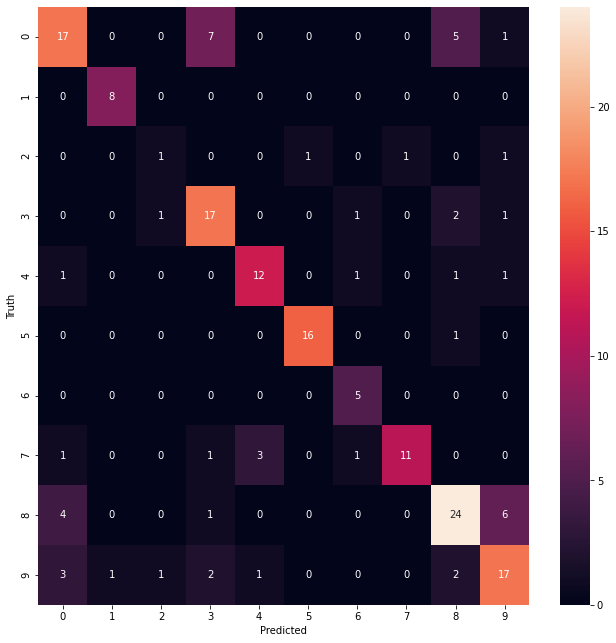

In [113]:
import seaborn as sn
plt.figure(figsize=(11,11))
sn.heatmap(cm,annot=True)
plt.xlabel('Predicted')
plt.ylabel('Truth')

In [111]:
class_dict

{'kyle_jenner': 0,
 'virat_kohli': 1,
 'abd': 2,
 '.ipynb_checkpoints': 3,
 'anne_marie': 4,
 'cristiano_ronaldo': 5,
 'taylor_swift': 6,
 'zlatan': 7,
 'messi': 8,
 'kendall_jenner': 9,
 'selena_gomez': 10}